In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input , Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
#Loading the data : 
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train) , (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
print("X_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", x_test.shape)
print("y_test : ", y_test.shape)

X_train :  (50000, 32, 32, 3)
y_train :  (50000, 1)
X_test :  (10000, 32, 32, 3)
y_test :  (10000, 1)


In [ ]:

x_train, x_test  = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print("X_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", x_test.shape)
print("y_test : ", y_test.shape)

X_train :  (50000, 32, 32, 3)
y_train :  (50000,)
X_test :  (10000, 32, 32, 3)
y_test :  (10000,)


In [ ]:
K = len(set(y_train))
print("There are {} classes".format(K))

There are 10 classes


In [ ]:
#Building the model :
i = Input(x_train[0].shape)
x=Conv2D(32,(3,3), strides=2, padding="valid", activation ="relu")(i)
x=Conv2D(64,(3,3), strides=2, padding="valid", activation ="relu")(x)
x=Conv2D(128,(3,3), strides=2, padding="valid", activation ="relu")(x)
x= Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512, activation ="relu")(x)
x=Dropout(0.2)(x)
x=Dense(K, activation ="softmax")(x)
model =Model(i, x)

In [ ]:
#Compile and fit : 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history =model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5175 - accuracy: 0.4471 - val_loss: 1.2517 - val_accuracy: 0.5564
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1883 - accuracy: 0.5760 - val_loss: 1.1012 - val_accuracy: 0.6061
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0325 - accuracy: 0.6344 - val_loss: 1.0152 - val_accuracy: 0.6434
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9126 - accuracy: 0.6766 - val_loss: 0.9273 - val_accuracy: 0.6745
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8219 - accuracy: 0.7082 - val_loss: 0.8802 - val_accuracy: 0.6920
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7386 - accuracy: 0.7398 - val_loss: 0.8686 - val_accuracy: 0.7028
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6628 - accuracy: 0.7631 - val_loss: 0.8539 - val_accuracy

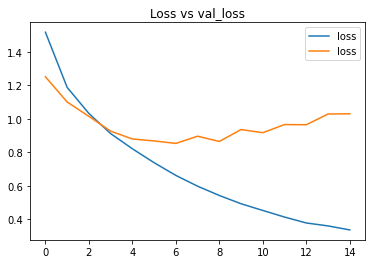

In [ ]:
plt.plot(history.history["loss"], label ="loss")
plt.plot(history.history["val_loss"],label="loss")
plt.title("Loss vs val_loss")
plt.legend()
plt.show()

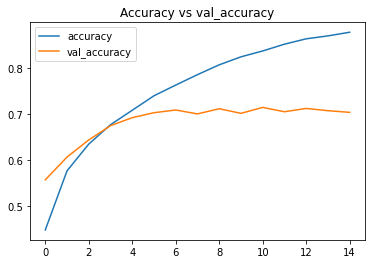

In [ ]:
#Plotting the accuracy per iteration : 
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy vs val_accuracy")
plt.legend()
plt.show()

# Improving the results :

#### Adding batch normalization 
#### Doing Conv x Pool instead of (2,2) strides

In [ ]:
#Loading the data : 
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train) , (x_test, y_test) = cifar10.load_data()

x_train, x_test  = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print("X_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", x_test.shape)
print("y_test : ", y_test.shape)

170498071/170498071 [==============================] - 14s 0us/step
X_train :  (50000, 32, 32, 3)
y_train :  (50000,)
X_test :  (10000, 32, 32, 3)
y_test :  (10000,)


In [ ]:
K = len(set(y_train))
print("There are {} classes".format(K))

There are 10 classes


In [ ]:
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D
#Building the model : 
i=Input(x_train[0].shape)

x= Conv2D(32,(3,3), activation="relu", padding="same")(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3), activation="relu", padding="same")(x)
x=BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)

x=Conv2D(64, (3,3), activation ="relu", padding="same")(x)
x= BatchNormalization()(x)
x=Conv2D(64, (3,3), activation ="relu", padding="same")(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Conv2D(128, (3,3), activation ="relu", padding="same")(x)
x= BatchNormalization()(x)
x=Conv2D(128, (3,3), activation ="relu", padding="same")(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

#Stage 2
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024, activation ="relu")(x)
x=Dropout(0.2)(x)
x=Dense(K, activation="softmax")(x)

model= Model(i,x)

In [ ]:
#Compile :
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history= model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2965 - accuracy: 0.5501 - val_loss: 0.9652 - val_accuracy: 0.6635
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8523 - accuracy: 0.7045 - val_loss: 0.8237 - val_accuracy: 0.7173
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6910 - accuracy: 0.7617 - val_loss: 0.6896 - val_accuracy: 0.7686
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5792 - accuracy: 0.8006 - val_loss: 0.7367 - val_accuracy: 0.7503
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4875 - accuracy: 0.8336 - val_loss: 0.7308 - val_accuracy: 0.7601
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4222 - accuracy: 0.8542 - val_loss: 0.6340 - val_accuracy: 0.8037
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3578 - accuracy: 0.8773 - val_loss: 0.6242 - val_ac

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8800 - accuracy: 0.8358


[0.8799952864646912, 0.8357999920845032]

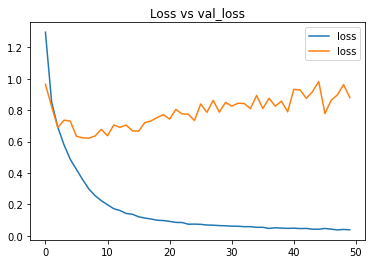

In [ ]:
plt.plot(history.history["loss"], label ="loss")
plt.plot(history.history["val_loss"],label="loss")
plt.title("Loss vs val_loss")
plt.legend()
plt.show()

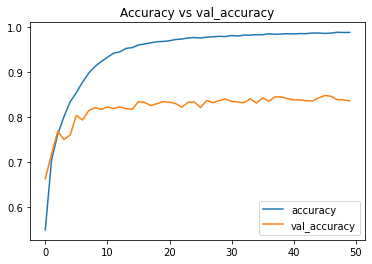

In [ ]:
#Plotting the accuracy per iteration : 
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy vs val_accuracy")
plt.legend()
plt.show()

##### Overfits a lot , maybe changing the learning rate could improve this

#### Adding data augmentation

In [ ]:
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D
#Building the model : 
i=Input(x_train[0].shape)

x= Conv2D(32,(3,3), activation="relu", padding="same")(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3), activation="relu", padding="same")(x)
x=BatchNormalization()(x)
x= MaxPooling2D((2,2))(x)

x=Conv2D(64, (3,3), activation ="relu", padding="same")(x)
x= BatchNormalization()(x)
x=Conv2D(64, (3,3), activation ="relu", padding="same")(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

x=Conv2D(128, (3,3), activation ="relu", padding="same")(x)
x= BatchNormalization()(x)
x=Conv2D(128, (3,3), activation ="relu", padding="same")(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)

#Stage 2
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024, activation ="relu")(x)
x=Dropout(0.2)(x)
x=Dense(K, activation="softmax")(x)

model= Model(i,x)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#fit with data augmentation : 
batch_size=32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1 , height_shift_range=0.1 ,horizontal_flip=True )
train_generator = data_generator.flow(x_train,y_train, batch_size)


history = model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=x_train.shape[0]//batch_size, epochs= 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1562/1562 [==============================] - 41s 21ms/step - loss: 1.4223 - accuracy: 0.5046 - val_loss: 1.2928 - val_accuracy: 0.5808
Epoch 2/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.9821 - accuracy: 0.6579 - val_loss: 0.8029 - val_accuracy: 0.7289
Epoch 3/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.8264 - accuracy: 0.7172 - val_loss: 0.7253 - val_accuracy: 0.7539
Epoch 4/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.7422 - accuracy: 0.7459 - val_loss: 0.8222 - val_accuracy: 0.7287
Epoch 5/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.6824 - accuracy: 0.7662 - val_loss: 0.6108 - val_accuracy: 0.7947
Epoch 6/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.6271 - accuracy: 0.7872 - val_loss: 0.5949 - val_accuracy: 0.8037
Epoch 7/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.5863 - accuracy: 0.8005 - val_loss: 0.7838 - val_accura

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3858 - accuracy: 0.8902


[0.3857845962047577, 0.8902000188827515]

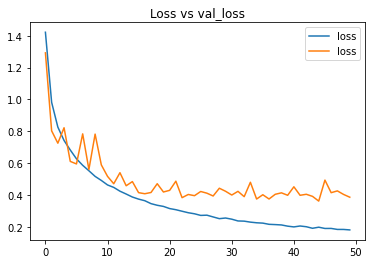

In [ ]:
plt.plot(history.history["loss"], label ="loss")
plt.plot(history.history["val_loss"],label="loss")
plt.title("Loss vs val_loss")
plt.legend()
plt.show()

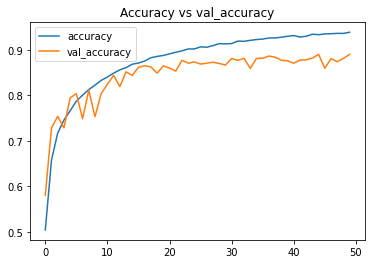

In [ ]:
#Plotting the accuracy per iteration : 
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy vs val_accuracy")
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     